# Laboratorio 5: Patrones Normales

Fragoso Alvarado Daniel | 316049054

### 1. Implementación del Clasificador de Bayes

Recordemos que la función de decisión de un clasificador de pagtrones normales esta dada por:

$$
d_{i}(x)=-\frac{1}{2} \ln \left|\Sigma_{i}\right|-\frac{1}{2}\left(x-\mu_{i}\right)^{T} \Sigma_{i}^{-1}\left(x-\mu_{i}\right)+\ln \left(p\left(C_{i}\right)\right)
$$

donde; 

$$
\begin{aligned}
&\mu_{i}=\int_{\mathbb{R}^{n}} x_{i} p(x) d x \\
&\sigma_{i j}=\int_{\mathbb{R}^{n}}\left(x_{i}-\mu_{i}\right)\left(x_{j}-\mu_{j}\right) p(x) d x
\end{aligned}
$$

la media, y los elemntos de la matriz de covarianza respectivamente. Los patrones más cercanos serán los clasificados, vamos a implementarlo partiendo de que el usuario nos da valores como la media y la covarianza.

In [2]:
import math
import numpy as np

def Bayes_dis(sigma, mu, x, p):
    '''
    Función que genera la distancia de cada patron según Bayes.

    Parámetros
    ----------
    sigma : Array
        Matriz de covarianza

    mu : Array
        Matriz de media.

    pc: Entero
        Valor de probabilidad

    Retorna 
    ----------
    distancia : Float
        Valor flotante que representa lal distancia a la clase Ci
    '''
    return(-1/2*(np.log(np.linalg.det(sigma))) - 1/2*np.dot((x.T-mu.T).T, np.dot(np.linalg.inv(sigma),(x.T-mu.T)))+ np.log(p))


In [3]:
def Bayes_Normal(sigma, mu, pc, data):
    '''
    Función que clasifica 'data' por medio de bayes.

    Parámetros
    ----------
    data : Lista de listas.
        Los patrones que deseamos clasificar.
        
    sigma : Lista de Lista
        Lista de Matrices de covarianza

    mu : Lista de Lista
        Lista de Matrices de media.

    pc: Lista de Listas
        Lista de valores de probabilidad

    Retorna 
    ----------
    labels : Lista
        Es una lista que indica el grupo al que pertenece cada patrón.
    '''
    labels = []
    clases = len(sigma)
    for x in data:
        dis = []
        for i in range(clases):
            dis.append(Bayes_dis(np.array(sigma[i]), np.array(mu[i]), np.array(x), np.array(pc[i])))

        max_value = max(dis)
        max_index = dis.index(max_value)
        labels.append(max_index)
    return(labels)

### 2. Conjunto de datos del iris

Vamos a obtener los datos de los conjuntos ya implemnetados en Sklearn:

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
# Ahora vamos a tomar los datos
X = iris.data
y = iris.target

### 3. Aplicar el Algoritmo

In [6]:
# Los valores default estaran dados por la media y convarianza para cada categoria:

# Media:

mu1 = X[y == 0].mean(0)
mu2 = X[y == 1].mean(0)
mu3 = X[y == 2].mean(0)

# Covarianza:

sigma1 = np.cov(X[y == 0].T)
sigma2 = np.cov(X[y == 1].T)
sigma3 = np.cov(X[y == 2].T)

# Pci donde vamos a calcularla con la probabilidad de que un grupo pertenezca 
# a alguna de las calasificaciones dado el conjunto:

p1 = 1/3
p2 = 1/3
p3 = 1/3

In [7]:
# Aplicamos el algoritmo:
labels = Bayes_Normal([sigma1, sigma2, sigma3], [mu1, mu2, mu3], [p1, p2, p3], X)

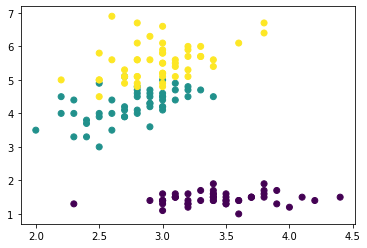

In [8]:
#GRAFICA 1
# VALORES ORIGINALES
import matplotlib.pyplot as plt
import seaborn as sb

plt.scatter(X[:, 1], X[:, 2], c=y)
plt.show()

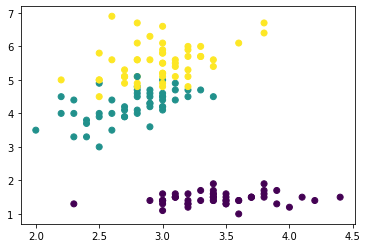

In [9]:
#GRAFICA 2  
# VALORES CLASIFICADOS CON BAYES
plt.scatter(X[:, 1], X[:, 2], c=labels)
plt.show()

### 4. Con KNN

Vamos a agregar el algoritmo antes implementado en clase, y vamos a establecer solo 1 vecino:

In [10]:
from collections import Counter
from scipy.spatial import distance

def Kvecinos(X, y, k, Patrones):
    '''
    Kvecinos:
      Función que clasifica puntos de un conjunto de datos a partir de KNN con la 
      distancia euclidea

    Parámetros
    ----------
    X:  Lista
      Conjunto de patreones clasificados
    y:  Lista 
      Conjunto de etiquetas de clase
    k:  Número entero 
      Número de Vecinos
    Patrones: Lista
      Conjunto de patrones que vamos a clasificar
    '''
    # Generamos lista vacia para establcer las clasificaciones
    predict = []

    # Tratamos de clasificar
    for patron in Patrones:
        # Lista para almacena distancias
        distances = []
        for x in X:
            distances.append(distance.euclidean(x, patron))
        # Selección del número de indices que nos interesan
        k_indice = np.argsort(distances)[:k] # Esto nos da el índice de las primeras k distancias. 
        # Obtenemos de y_train la etiqueta
        k_label = [y[i] for i in k_indice]
        # Ahora para clasificarlo vamos a buscar la etiqueta que más se repite
        # por medio de la función counter. y el atributo moss_common que da una lista 
        # de tuplas que en primer lugar tienen el elemnto de mayor repetición entonces 
        predict.append(Counter(k_label).most_common(1)[0][0])
    return predict

In [11]:
from sklearn.model_selection import train_test_split
#Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Aplicamos el algoritmo de k-vecinos
labelsknn = Kvecinos(X_train, y_train, 1, X_test)

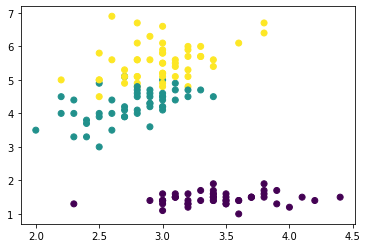

In [13]:
# GRAFICA 3 
# CLASIFICACIÓN CON  KNN
plt.scatter(X_test[:, 1], X_test[:, 2], c=labelsknn)
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train)
plt.show()

In [14]:
# Aplicamos Bayes al mismo cojunto de entrenamiento
bayes =  Bayes_Normal([sigma1, sigma2, sigma3], [mu1, mu2, mu3], [p1, p2, p3], X_test)
knn =  labelsknn

In [15]:
bayes == knn

True

Notemos que para k = 1, la clasificación es igual, al mneos para este subconjunto conjuunto de datos.

### 5. Métricas

Notemos que el calculo de las métricas TN, FP, FN, TP, Así como la Specificity, Negative rate,  precision, recall, accuracy y F1-Score
son métricas que dependen de clasificaciones binarias. Por ello para calcularlas vamos a calcular la matriz de confusión y a partir de esta vamos a calular las métricas para cada valor fijado, de forma que:

![Cat](AuTKP.png)


Usaremos las implementaciones de sklearn para mayor practicidad:

In [16]:
# Notemos que el calculo de TN, FD, FN, y TP equivale a la matriz de confusión:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, labels)

conf_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [81]:
# PARA 0:

i = 0
tp = conf_matrix[i, i]
tn = conf_matrix[i+1:,i+1: ].sum() + conf_matrix[0:i,0:i].sum()
fp = conf_matrix[i+1:,i].sum() + conf_matrix[:i,i].sum()
fn = conf_matrix[i, :i].sum() + conf_matrix[i, i+1:].sum()

spe = tn/(tn+fp)
recal = tp/(tp+fn)
pres = tp/(tp+fp)
neg = tn/(fn+tn)
accu = (tp+tn)/(tp+fp+tn+fn)
f1 = (2*recal*pres)/(recal+pres)

print('Para la categoria: {}\n'.format(i))

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))

print('\n------ Metricas: ------ \n')

print('Specificity: {}'.format(spe))
print('Recall: {}'.format(recal))
print('Negative rate: {}'.format(neg))
print('Precision: {}'.format(pres))

print('Accuracy: {}'.format(accu))
print('F1 - Score: {}'.format(f1))


Para la categoria: 0

TP: 50
TN: 100
FP: 0
FN: 0

------ Metricas: ------ 

Specificity: 1.0
Recall: 1.0
Negative rate: 1.0
Precision: 1.0
Accuracy: 1.0
F1 - Score: 1.0


In [80]:
# PARA 1:

i = 1
tp = conf_matrix[i, i]
tn = conf_matrix[i+1:,i+1: ].sum() + conf_matrix[0:i,0:i].sum()
fp = conf_matrix[i+1:,i].sum() + conf_matrix[:i,i].sum()
fn = conf_matrix[i, :i].sum() + conf_matrix[i, i+1:].sum()

spe = tn/(tn+fp)
recal = tp/(tp+fn)
pres = tp/(tp+fp)
neg = tn/(fn+tn)
accu = (tp+tn)/(tp+fp+tn+fn)
f1 = (2*recal*pres)/(recal+pres)

print('Para la categoria: {}\n'.format(i))

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))

print('\n------ Metricas: ------ \n')

print('Specificity: {}'.format(spe))
print('Recall: {}'.format(recal))
print('Negative rate: {}'.format(neg))
print('Precision: {}'.format(pres))

print('Accuracy: {}'.format(accu))
print('F1 - Score: {}'.format(f1))

Para la categoria: 1

TP: 48
TN: 99
FP: 1
FN: 2

------ Metricas: ------ 

Specificity: 0.99
Recall: 0.96
Negative rate: 0.9801980198019802
Precision: 0.9795918367346939
Accuracy: 0.98
F1 - Score: 0.9696969696969697


In [79]:
# PARA 2:

i = 2
tp = conf_matrix[i, i]
tn = conf_matrix[i+1:,i+1: ].sum() + conf_matrix[0:i,0:i].sum()
fp = conf_matrix[i+1:,i].sum() + conf_matrix[:i,i].sum()
fn = conf_matrix[i, :i].sum() + conf_matrix[i, i+1:].sum()

spe = tn/(tn+fp)
recal = tp/(tp+fn)
pres = tp/(tp+fp)
neg = tn/(fn+tn)
accu = (tp+tn)/(tp+fp+tn+fn)
f1 = (2*recal*pres)/(recal+pres)

print('Para la categoria: {}\n'.format(i))

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))

print('\n------ Metricas: ------ \n')

print('Specificity: {}'.format(spe))
print('Recall: {}'.format(recal))
print('Negative rate: {}'.format(neg))
print('Precision: {}'.format(pres))

print('Accuracy: {}'.format(accu))
print('F1 - Score: {}'.format(f1))

Para la categoria: 2

TP: 49
TN: 98
FP: 2
FN: 1

------ Metricas: ------ 

Specificity: 0.98
Recall: 0.98
Negative rate: 0.98989898989899
Precision: 0.9607843137254902
Accuracy: 0.98
F1 - Score: 0.9702970297029702
